In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore') 

In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')
# id : 구분자
# rho : 측정 거리 (단위: mm)
# src : 광원 스펙트럼 (650 nm ~ 990 nm)
# dst : 측정 스펙트럼 (650 nm ~ 990 nm)

# hhb : 디옥시헤모글로빈 농도
# hbo2 : 옥시헤모글로빈 농도
# ca : 칼슘 농도
# na : 나트륨 농도

In [154]:
train.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
0,0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42


In [155]:
test.head()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
0,10000,15,0.15406,0.23275,0.30977,0.42949,0.51264,0.62558,0.74340,0.85418,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,NaN,7.320236e-14
1,10001,15,0.48552,0.56939,0.67575,0.79089,0.85114,0.92581,0.98071,0.98177,...,1.036013e-13,NaN,2.830975e-14,1.114337e-13,4.825731e-14,NaN,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
2,10002,10,0.46883,0.56085,0.62442,0.73172,0.81724,0.91517,0.94801,0.99108,...,NaN,NaN,NaN,NaN,1.569208e-11,6.242378e-12,NaN,1.219010e-11,NaN,NaN
3,10003,10,0.06905,0.07517,0.10226,0.14905,0.16182,0.19659,0.26085,0.36753,...,1.651177e-11,7.282747e-12,5.010879e-12,NaN,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,NaN
4,10004,25,0.00253,0.00757,0.01649,0.00128,0.00000,0.00000,0.00105,0.01975,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15


In [156]:
train.describe()

,id,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,7.982000e+03,7.987000e+03,7.992000e+03,7.931000e+03,8.081000e+03,8.013000e+03,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,17.568000,0.180212,0.203529,0.229804,0.259158,0.289975,0.322244,0.354101,0.384492,...,7.511190e-11,4.270426e-11,2.498465e-11,4.047717e-11,1.153774e-10,2.364072e-10,7.990686,4.009146,9.019226,3.042651
std,2886.89568,5.595847,0.272859,0.288661,0.306340,0.324849,0.342362,0.357700,0.370451,0.379054,...,3.831916e-10,2.293432e-10,1.639150e-10,2.134495e-10,5.179299e-10,1.058272e-09,2.970818,0.997828,2.979453,1.881872
min,0.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.080000,0.000000,0.000000
25%,2499.75000,15.000000,0.007318,0.009520,0.011270,0.013728,0.016350,0.019510,0.026217,0.037235,...,1.574964e-19,0.000000e+00,0.000000e+00,0.000000e+00,5.669218e-18,6.574627e-17,5.990000,3.330000,7.000000,1.640000
50%,4999.50000,20.000000,0.052025,0.064600,0.078565,0.095355,0.119635,0.148590,0.181905,0.219260,...,6.566552e-16,8.391564e-17,2.525680e-17,1.231848e-16,3.395726e-15,1.717923e-14,8.010000,4.010000,8.990000,2.980000
75%,7499.25000,25.000000,0.221117,0.276952,0.339075,0.417478,0.510915,0.607150,0.698085,0.781490,...,9.503366e-13,3.186890e-13,1.234955e-13,2.958971e-13,2.392410e-12,6.942183e-12,10.010000,4.700000,11.020000,4.330000
max,9999.00000,25.000000,1.019990,1.019970,1.019930,1.019880,1.020000,1.019970,1.019970,1.019940,...,1.343132e-08,6.461523e-09,5.773867e-09,5.529940e-09,1.013262e-08,2.682289e-08,21.590000,7.690000,20.070000,10.310000


In [157]:
print ("Size of train data : {}" .format(train.shape))
print ("Size of test data : {}" .format(test.shape))

Size of train data : (10000, 76)
Size of test data : (10000, 72)


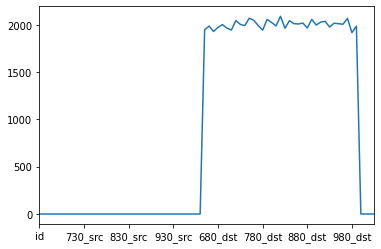

In [158]:
train.isna().sum().plot()

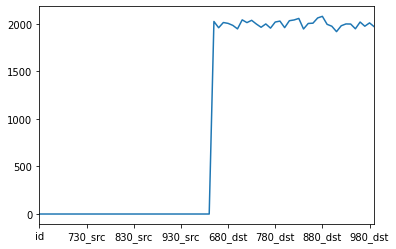

In [159]:
test.isna().sum().plot()

In [4]:
train = train.fillna(train.mean())
test = test.fillna(test.mean())

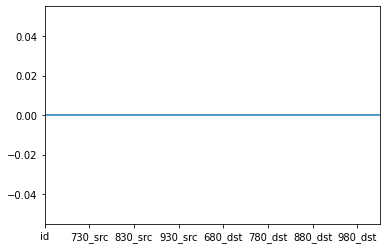

In [161]:
train.isna().sum().plot()

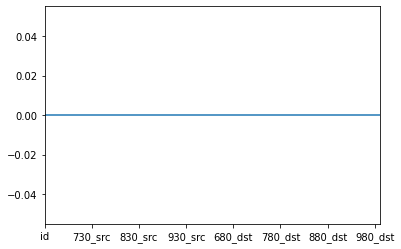

In [162]:
test.isna().sum().plot()

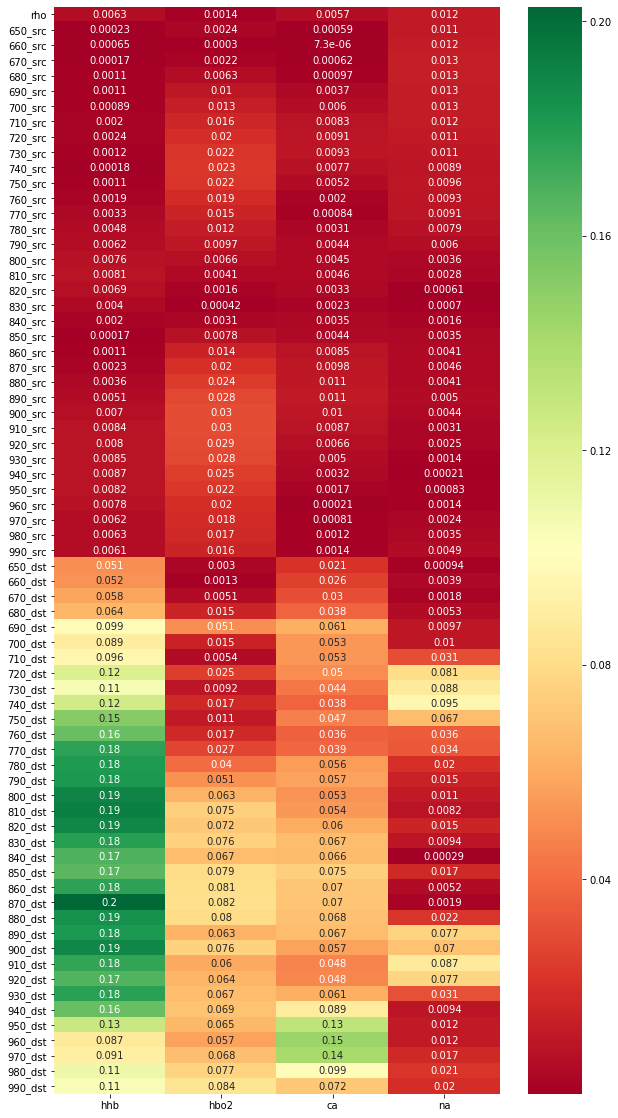

In [5]:
plt.figure(figsize=(10,20))
sns.heatmap(train.corr().loc['rho':'990_dst', 'hhb':].abs(), annot=True, cmap='RdYlGn')

In [164]:
# 나중에 다중공선성이 높은 변수 해결하고 다시 모델링 해보자
# 성능 좋아지는지 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(train.values, i) for i in range(train.shape[1])]
vif['features'] = train.columns

vif

,VIF Factor,features
0,3.844494,id
1,9.857937,rho
2,340.791721,650_src
3,783.033760,660_src
4,920.552750,670_src
...,...,...
71,4.126644,990_dst
72,7.527583,hhb
73,12.722687,hbo2
74,8.914596,ca


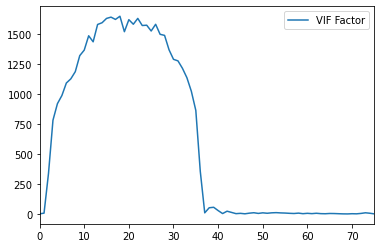

In [165]:
vif.plot()


 mu = 7.99 and sigma = 2.97



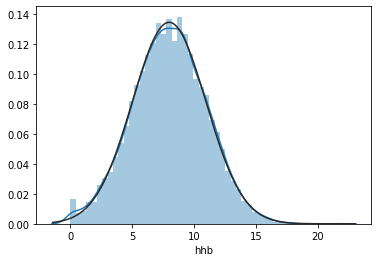

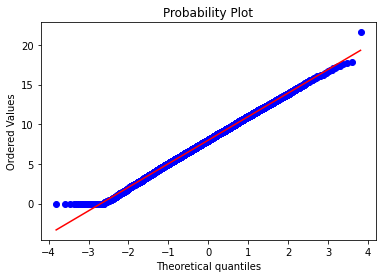

In [8]:
# 종속변수들의 skewness 확인

from scipy import stats
from scipy.stats import norm, skew

def check_skewness(col):
    sns.distplot(col, fit=norm);
    # distplot을 통해 정규분포와 종속변수 분포 비교
    fig = plt.figure()
    res = stats.probplot(col, plot=plt) # Q-Q plot
    # Q-Q plot은 시각적으로 간단하게 정규 분포를 확인
    # 꼬리 쪽이 휠수록 정규분포를 따르지 않음 
    (mu, sigma) = norm.fit(col) # mu, sigma : 모평균과 표준편차
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
check_skewness(train['hhb'])


 mu = 4.01 and sigma = 1.00



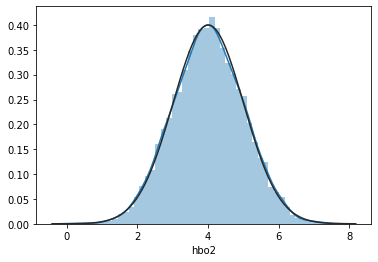

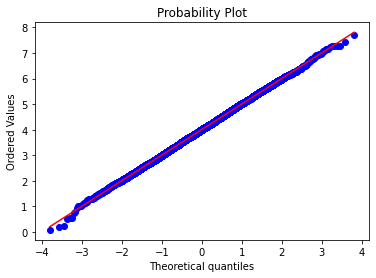

In [117]:
check_skewness(train['hbo2'])


 mu = 9.02 and sigma = 2.98



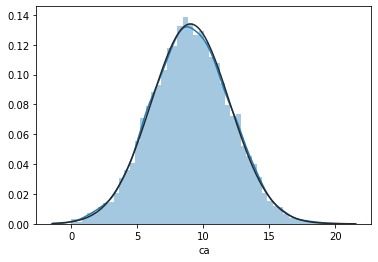

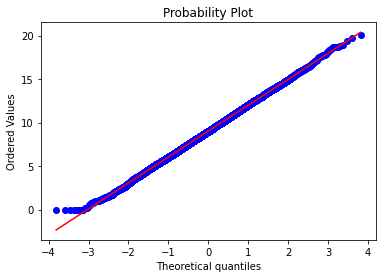

In [118]:
check_skewness(train['ca'])


 mu = 3.04 and sigma = 1.88



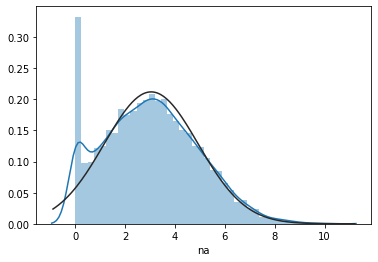

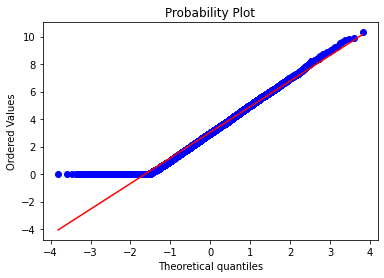

In [119]:
check_skewness(train['na'])

In [6]:
ntrain = train.shape[0]
ntest = test.shape[0]
Y_train = train.loc[:, 'hhb':'na']
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['hhb', 'hbo2', 'ca', 'na'], axis=1, inplace=True)
all_data.head()

,650_dst,650_src,660_dst,660_src,670_dst,670_src,680_dst,680_src,690_dst,690_src,...,960_dst,960_src,970_dst,970_src,980_dst,980_src,990_dst,990_src,id,rho
0,2.447758e-18,0.37950,1.894578e-18,0.42993,0.000000e+00,0.52076,6.412913e-18,0.57166,1.098559e-17,0.67818,...,2.498465e-11,0.10965,1.067504e-18,0.07424,5.998949e-18,0.07777,4.378513e-17,0.05536,0,25
1,0.000000e+00,0.00000,0.000000e+00,0.00000,0.000000e+00,0.01813,1.995530e-10,0.00000,1.025259e-10,0.00000,...,2.130547e-09,0.87045,4.047717e-11,0.75330,9.710091e-09,0.63414,2.364072e-10,0.53699,1,10
2,1.677445e-19,0.00000,3.763590e-20,0.03289,7.149459e-12,0.02416,0.000000e+00,0.03610,5.830921e-12,0.05843,...,0.000000e+00,0.06744,0.000000e+00,0.02343,1.329725e-18,0.03926,2.364072e-10,0.03136,2,25
3,4.044975e-11,0.27503,1.049022e-11,0.31281,5.345363e-11,0.32898,9.106886e-12,0.41041,1.881458e-11,0.46587,...,7.782625e-11,0.09928,4.047717e-11,0.09239,4.088921e-10,0.10523,2.364072e-10,0.06349,3,10
4,4.784751e-14,1.01521,1.049022e-11,1.00872,0.000000e+00,0.98930,1.153089e-13,0.98874,0.000000e+00,1.01773,...,2.498465e-11,0.99439,1.330237e-13,0.98597,1.153774e-10,0.99889,2.364072e-10,1.01412,4,15


In [9]:
# skew()함수 이용해 모든 숫자형 변수들의 skew 확인
skewed_feats = all_data.apply(
    lambda x: skew(x.dropna())).sort_values(ascending=False)

print("\nSkew in all data: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in all data: 



,Skew
670_dst,98.633005
650_dst,91.152790
680_dst,86.472330
660_dst,81.438981
700_dst,68.936789
710_dst,56.291681
690_dst,51.673038
730_dst,33.345867
740_dst,30.629771
850_dst,28.960822


In [10]:
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

In [11]:
train = all_data[:ntrain]
test = all_data[ntrain:]

train.shape, test.shape

((10000, 72), (10000, 72))

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

x_train = train
y_train = Y_train

### 1. XGBoost

In [20]:
# 1
def train_model(x_data, y_data, k=5):
    models = []
    
    k_fold = KFold(n_splits=k, shuffle=True, random_state=123)
    
    for train_idx, val_idx in k_fold.split(x_data):
        x_train, y_train = x_data.iloc[train_idx], y_data[train_idx]
        x_val, y_val = x_data.iloc[val_idx], y_data[val_idx]
    
        d_train = xgb.DMatrix(data = x_train, label = y_train)
        d_val = xgb.DMatrix(data = x_val, label = y_val)
        
        wlist = [(d_train, 'train'), (d_val, 'eval')]
        
        params = {
            'objective': 'reg:squarederror',
            'eval_metric': 'mae',
            'seed':777
            }

        model = xgb.train(params=params, dtrain=d_train, num_boost_round=500, verbose_eval=500, evals=wlist)
        models.append(model)
    
    return models

In [21]:
models = {}
for label in y_train.columns:
    print('train column : ', label)
    models[label] = train_model(x_train, y_train[label])

train column :  hhb
[0]	train-mae:5.30620	eval-mae:5.28557
[499]	train-mae:0.01443	eval-mae:1.15118
[0]	train-mae:5.31267	eval-mae:5.25907
[499]	train-mae:0.01537	eval-mae:1.12507
[0]	train-mae:5.30556	eval-mae:5.30628
[499]	train-mae:0.01589	eval-mae:1.13750
[0]	train-mae:5.29930	eval-mae:5.33589
[499]	train-mae:0.01310	eval-mae:1.10175
[0]	train-mae:5.29757	eval-mae:5.35015
[499]	train-mae:0.01303	eval-mae:1.10709
train column :  hbo2
[0]	train-mae:2.46068	eval-mae:2.47510
[499]	train-mae:0.01095	eval-mae:0.70494
[0]	train-mae:2.45945	eval-mae:2.48064
[499]	train-mae:0.01080	eval-mae:0.71343
[0]	train-mae:2.46891	eval-mae:2.42777
[499]	train-mae:0.01019	eval-mae:0.71316
[0]	train-mae:2.46025	eval-mae:2.47510
[499]	train-mae:0.01038	eval-mae:0.71034
[0]	train-mae:2.46398	eval-mae:2.45324
[499]	train-mae:0.01054	eval-mae:0.72645
train column :  ca
[0]	train-mae:5.99455	eval-mae:6.09089
[499]	train-mae:0.03400	eval-mae:2.10584
[0]	train-mae:6.00375	eval-mae:6.03554
[499]	train-mae:0.031

In [25]:
for col in models:
    preds = []
    for model in models[col]:
        preds.append(model.predict(xgb.DMatrix(test)))
        
    pred = np.mean(preds, axis=0)
    submission[col] = pred

In [263]:
submission.head()

,id,hhb,hbo2,ca,na
0,10000,8.408510,3.858311,10.031496,3.543458
1,10001,5.809864,3.824162,9.477526,1.930609
2,10002,10.596582,3.827821,9.578325,3.338836
3,10003,8.633074,3.303360,10.445689,2.706058
4,10004,7.827500,3.109745,8.222136,4.161625


In [264]:
submission.to_csv('Dacon_1.csv', index=False)

- 리더보드 점수 : 1.2916108618
- src변수까지 다 포함시킨 건데 dst 변수만 포함시킨 것보다 점수가 높게나왔음